## Project Objective:

The objective of this project is to develop a robust and accurate machine learning model for the detection and classification of fake news using the (WELFake) dataset. The dataset, comprising 72,134 news articles sourced from popular datasets (Kaggle, McIntire, Reuters, BuzzFeed Political), includes titles, text content, and labels indicating whether each article is real (1) or fake (0).

The project aims to achieve the following specific goals:

1. Data Exploration and Preprocessing
2. Text Representation and Feature Engineering
3. Model Development and Training
4. Model Evaluation and Validation
5. Hyperparameter tuning
6. Comparison among model Approaches

## Loading The Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("WELFake_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
len(df)

72134

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [6]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


## Data Exploration and Data Preprocessing

### Checking for null values and filling the null values. 
Here in this case we chose to fill values with an empty strinmg rather than removing the rows because filling missing values allows you to preserve the rows containing other valuable information. Removing rows with missing values would result in a loss of potentially useful data. And removing rows reduces the size of your dataset, which can impact the statistical power and generalizability of your models. Filling missing values allows you to keep the original dataset size.

In [7]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [8]:
df['text'].fillna('', inplace=True)
df['title'].fillna('', inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


### Dropping Unnamed :0 column

In [11]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [12]:

df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


### Checking for any data imbalance

In [13]:
label_counts = df['label'].value_counts()

fakenews = label_counts.get(0, 0) / len(df)
realnews = label_counts.get(1, 0) / len(df)

print("Ratio of fakenews:", fakenews)
print("Ratio of realnews:", realnews)

Ratio of fakenews: 0.4855962514209665
Ratio of realnews: 0.5144037485790335


### Combining text and title as description column

Combined text and title columns because combining two text columns for prediction offers advantages by enriching the input data, enhancing contextual understanding, and improving feature representation. This approach can address redundancy issues, mitigate sparse data challenges, and enable customized text processing. It provides flexibility in feature engineering, allowing experimentation with various methods of combining text, ultimately contributing to the model's ability to capture more nuanced patterns and improve predictive performance.

In [14]:
df['Description']=df['title']+" "+df['text']

In [15]:
df.head()

,title,text,label,Description
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...


In [16]:
df.isnull().sum()

title          0
text           0
label          0
Description    0
dtype: int64

## Data Visualization

### Real Vs Fake News

/Users/saikrishnaadityagorthi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


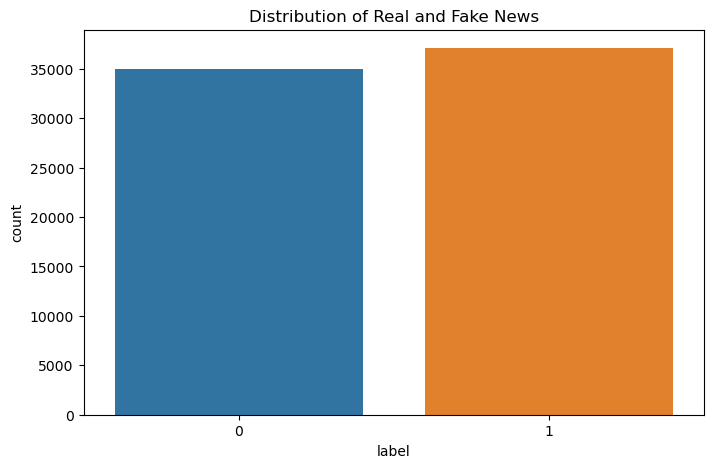

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribution of Real and Fake News')
plt.show()

### Word cloud for Description

 A word cloud visualization from the combined "Title" and "Description" columns of a DataFrame. This visualization gives a concise and visually appealing representation of the most frequent words in the text from Description, aiding in the quick identification of key terms and themes. The larger the word appears in the cloud, the more frequently it occurs in the dataset. This is for summarizing and exploring textual content, facilitating data preprocessing decisions.

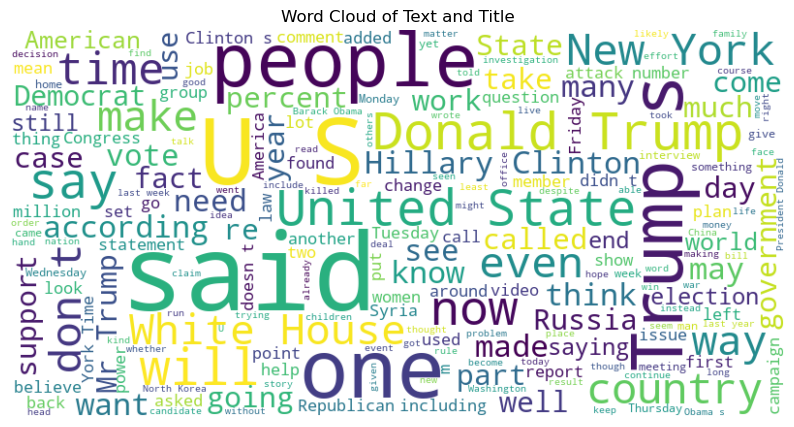

In [18]:
from wordcloud import WordCloud

text_combined = ' '.join(df['Description'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Text and Title')
plt.show()

### Text and Title lengths

From this visuvalization we can get the distribution of text and title lengths and we can infer the length of given text or title and can decide the news as fake or real.

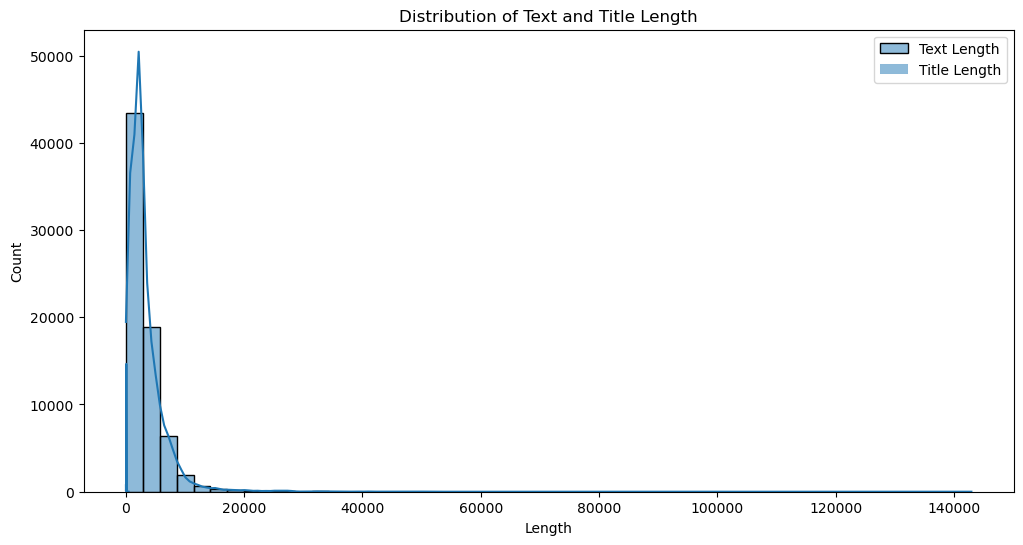

In [19]:
df['text_length'] = df['text'].apply(len)
df['title_length'] = df['title'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=50, kde=True, label='Text Length')
sns.histplot(df['title_length'], bins=50, kde=True, label='Title Length')
plt.title('Distribution of Text and Title Length')
plt.xlabel('Length')
plt.legend()
plt.show()

### Correlation Heatmap

In this we can see that the lengths have no prominent effect on the output label

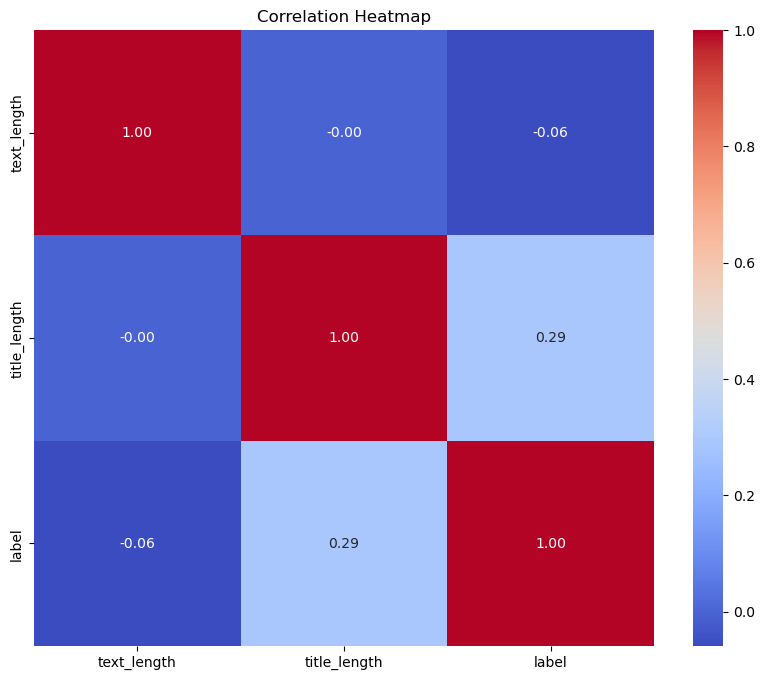

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['text_length', 'title_length', 'label']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Word cloud of fake News

From this we can infer the words in the description which makes news to be fake news.

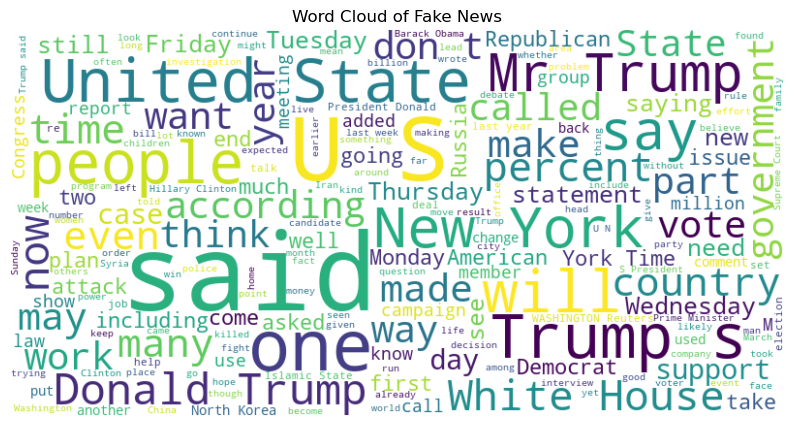

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


fake_text = ' '.join(df[df['label'] == 0]['Description'])
fake_wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(fake_text)

plt.figure(figsize=(10, 7))
plt.imshow(fake_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Fake News')
plt.show()




### Word cloud of Real News

From this we can infer the words in the description which makes news to be Real news.

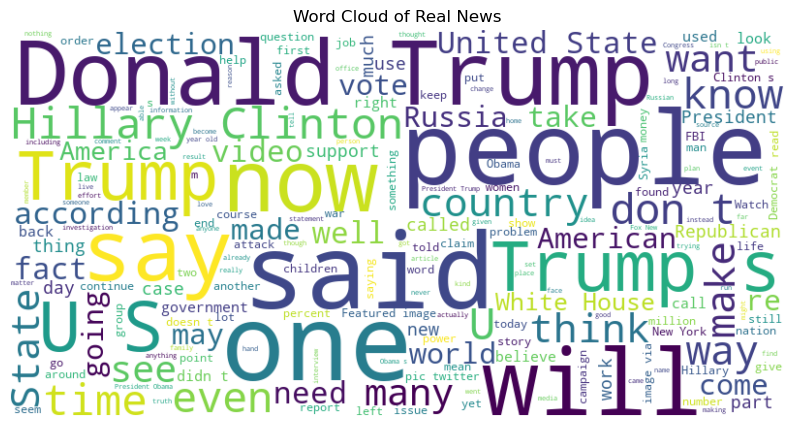

In [22]:
real_text = ' '.join(df[df['label'] == 1]['Description'])
real_wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(real_text)


plt.figure(figsize=(10, 7))
plt.imshow(real_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Real News')
plt.show()

## Model Deployment and Training

### Splitting data for training and testing the models

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['label'], test_size=0.2, random_state=42)

### Vectorization of data

Vectorization is a fundamental process in machine learning, converting textual data into numerical formats essential for algorithmic analysis. Machine learning algorithms require numeric input for efficient mathematical operations, and vectorization aids in feature extraction, capturing relationships between words. Techniques like TF-IDF and word embeddings contribute to dimensionality reduction, crucial in handling extensive vocabularies. Numeric representations also enhance model interpretability, enabling the examination of feature weights. Additionally, vectorization ensures consistency in input formats across diverse samples, providing fixed-size representations regardless of text length. These techniques collectively empower machine learning models to learn patterns and relationships within textual data, broadening their applicability.

I chose TD-IDF for vectorization. TF-IDF is a widely favored choice due to its capacity to capture term importance by considering both term frequency within a document and its rarity across the entire corpus. This dual consideration allows TF-IDF to highlight significant keywords while downplaying common terms, thus reducing noise and enhancing the model's ability to discern meaningful patterns. Its adaptability to varying document lengths, sparsity, and task independence make it a versatile and efficient method for tasks such as text classification and information retrieval.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


### Model Training, Prediction and Model Evaluation

As our problem is a binary classification problem. Used classification models perceptron, Random forest classifier, Neural Network using MLP, Least Squares Classification, Logistic Regression and Multinomail NaiveBayes.

### Perceptron

In [25]:
#Perceptron:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

perceptron_classifier = Perceptron()
perceptron_classifier.fit(X_train_tfidf, y_train)


y_pred_perceptron = perceptron_classifier.predict(X_test_tfidf)


accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
classification_report_perceptron = classification_report(y_test, y_pred_perceptron)

print(f"Perceptron Accuracy: {accuracy_perceptron}")
print("Perceptron Classification Report:\n", classification_report_perceptron)


Perceptron Accuracy: 0.9311014070839398
Perceptron Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      7089
           1       0.95      0.92      0.93      7338

    accuracy                           0.93     14427
   macro avg       0.93      0.93      0.93     14427
weighted avg       0.93      0.93      0.93     14427



### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier


random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


random_forest_classifier.fit(X_train_tfidf, y_train)


y_pred_random_forest = random_forest_classifier.predict(X_test_tfidf)


accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
classification_report_random_forest = classification_report(y_test, y_pred_random_forest)


print(f"Random Forest Accuracy: {accuracy_random_forest}")
print("Random Forest Classification Report:\n", classification_report_random_forest)


Random Forest Accuracy: 0.9566784501282318
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      7089
           1       0.95      0.97      0.96      7338

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



### Neural Network

In [27]:
from sklearn.neural_network import MLPClassifier

nn_classifier = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=10, random_state=42)

nn_classifier.fit(X_train_tfidf, y_train)

y_pred_nn = nn_classifier.predict(X_test_tfidf)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
classification_report_nn = classification_report(y_test, y_pred_nn)

print(f"Neural Network Accuracy: {accuracy_nn}")
print("Neural Network Classification Report:\n", classification_report_nn)

Neural Network Accuracy: 0.9552921605323352
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      7089
           1       0.95      0.96      0.96      7338

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



/Users/saikrishnaadityagorthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


### Least Square Classifier

In [28]:
from sklearn.linear_model import LinearRegression

least_squares_classifier = LinearRegression()
least_squares_classifier.fit(X_train_tfidf, y_train)
y_pred_least_squares = least_squares_classifier.predict(X_test_tfidf)
y_pred_least_squares_binary = [1 if pred > 0.5 else 0 for pred in y_pred_least_squares]


accuracy_least_squares = accuracy_score(y_test, y_pred_least_squares_binary)
classification_report_least_squares = classification_report(y_test, y_pred_least_squares_binary)

print(f"Least Squares Accuracy: {accuracy_least_squares}")
print("Least Squares Classification Report:\n", classification_report_least_squares)

Least Squares Accuracy: 0.9447563596035212
Least Squares Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      7089
           1       0.94      0.95      0.95      7338

    accuracy                           0.94     14427
   macro avg       0.95      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



### Logistic Regression classifier

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train_tfidf, y_train)

y_pred_logistic_regression = logistic_regression_classifier.predict(X_test_tfidf)


accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
classification_report_logistic_regression = classification_report(y_test, y_pred_logistic_regression)

print(f"Logistic Regression Accuracy: {accuracy_logistic_regression}")
print("Logistic Regression Classification Report:\n", classification_report_logistic_regression)

Logistic Regression Accuracy: 0.9445484161641367
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      7089
           1       0.94      0.95      0.95      7338

    accuracy                           0.94     14427
   macro avg       0.94      0.94      0.94     14427
weighted avg       0.94      0.94      0.94     14427



### Multinomial Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)


y_pred = classifier.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)


Accuracy: 0.8502807236431691
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      7089
           1       0.84      0.87      0.86      7338

    accuracy                           0.85     14427
   macro avg       0.85      0.85      0.85     14427
weighted avg       0.85      0.85      0.85     14427



### MultinomialNaive Bayes using Count Vectorizer

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)


Accuracy: 0.8967907395854994
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      7089
           1       0.91      0.88      0.90      7338

    accuracy                           0.90     14427
   macro avg       0.90      0.90      0.90     14427
weighted avg       0.90      0.90      0.90     14427



## Hyperparameter tuning using Optuna

Hyperparameter tuning is a critical step in the model development process that can significantly impact the effectiveness, efficiency, and robustness of machine learning models. In this check all the models for the best hyperparameters.

In [32]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


def objective(trial):
    X_train, X_val, y_train1, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    logistic_regression_classifier = LogisticRegression(C=C)
    logistic_regression_classifier.fit(X_train, y_train1)
    y_pred_val = logistic_regression_classifier.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    return accuracy_val


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)


best_params = study.best_params
best_C = best_params['C']


final_logistic_regression_classifier = LogisticRegression(C=best_C)
final_logistic_regression_classifier.fit(X_train_tfidf, y_train)


y_pred_final = final_logistic_regression_classifier.predict(X_test_tfidf)


accuracy_final = accuracy_score(y_test, y_pred_final)
classification_report_final = classification_report(y_test, y_pred_final)


print(f"Optimal Logistic Regression Hyperparameters: {best_params}")
print(f"Final Logistic Regression Accuracy: {accuracy_final}")
print("Final Logistic Regression Classification Report:\n", classification_report_final)


[I 2023-12-05 21:36:12,473] A new study created in memory with name: no-name-a78e62ad-0036-47b5-a78a-6c54c4c5aaed
/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/4208617205.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
/Users/saikrishnaadityagorthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2023-

/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/4208617205.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
/Users/saikrishnaadityagorthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2023-12-05 21:36:24,611] Trial 11 finished with value: 0.9425576156645296 and parameters: {'C': 68.31132347307687}. Bes

/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/4208617205.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
/Users/saikrishnaadityagorthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2023-12-05 21:36:36,847] Trial 20 finished with value: 0.9461098596430428 and parameters: {'C': 2.5604167419051955}. Be

Optimal Logistic Regression Hyperparameters: {'C': 4.801328015213178}
Final Logistic Regression Accuracy: 0.9498163166285437
Final Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      7089
           1       0.94      0.96      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



/Users/saikrishnaadityagorthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
import optuna
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


def perceptron_objective(trial):
    X_train, X_val, y_train1, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e0)
    perceptron_classifier = Perceptron(alpha=alpha)
    perceptron_classifier.fit(X_train, y_train1)
    y_pred_val = perceptron_classifier.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    return accuracy_val


perceptron_study = optuna.create_study(direction='maximize')
perceptron_study.optimize(perceptron_objective, n_trials=25)

perceptron_best_params = perceptron_study.best_params
perceptron_best_alpha = perceptron_best_params['alpha']


final_perceptron_classifier = Perceptron(alpha=perceptron_best_alpha)
final_perceptron_classifier.fit(X_train_tfidf, y_train)


y_pred_final_perceptron = final_perceptron_classifier.predict(X_test_tfidf)


accuracy_final_perceptron = accuracy_score(y_test, y_pred_final_perceptron)
classification_report_final_perceptron = classification_report(y_test, y_pred_final_perceptron)

print(f"Optimal Perceptron Hyperparameters: {perceptron_best_params}")
print(f"Final Perceptron Accuracy: {accuracy_final_perceptron}")
print("Final Perceptron Classification Report:\n", classification_report_final_perceptron)


[I 2023-12-05 21:36:44,784] A new study created in memory with name: no-name-202b9836-9979-4137-a2cc-6a6ebb998835
/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/4085000276.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e0)
[I 2023-12-05 21:36:44,989] Trial 0 finished with value: 0.9252295962571478 and parameters: {'alpha': 0.46771886767460646}. Best is trial 0 with value: 0.9252295962571478.
/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/4085000276.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e0)
[I 2023-12-05 21:36:45,189] 

[I 2023-12-05 21:36:47,963] Trial 15 finished with value: 0.9252295962571478 and parameters: {'alpha': 0.05279522470096327}. Best is trial 0 with value: 0.9252295962571478.
/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/4085000276.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e0)
[I 2023-12-05 21:36:48,167] Trial 16 finished with value: 0.9252295962571478 and parameters: {'alpha': 0.0004892201197564805}. Best is trial 0 with value: 0.9252295962571478.
/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/4085000276.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.sugge

Optimal Perceptron Hyperparameters: {'alpha': 0.46771886767460646}
Final Perceptron Accuracy: 0.9311014070839398
Final Perceptron Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      7089
           1       0.95      0.92      0.93      7338

    accuracy                           0.93     14427
   macro avg       0.93      0.93      0.93     14427
weighted avg       0.93      0.93      0.93     14427



In [34]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


def random_forest_objective(trial):
    X_train, X_val, y_train1, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    random_forest_classifier.fit(X_train, y_train1)
    y_pred_val = random_forest_classifier.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    return accuracy_val

random_forest_study = optuna.create_study(direction='maximize')
random_forest_study.optimize(random_forest_objective, n_trials=25)


random_forest_best_params = random_forest_study.best_params
random_forest_best_n_estimators = random_forest_best_params['n_estimators']
random_forest_best_max_depth = random_forest_best_params['max_depth']


final_random_forest_classifier = RandomForestClassifier(n_estimators=random_forest_best_n_estimators,
                                                        max_depth=random_forest_best_max_depth,
                                                        random_state=42)
final_random_forest_classifier.fit(X_train_tfidf, y_train)


y_pred_final_random_forest = final_random_forest_classifier.predict(X_test_tfidf)


accuracy_final_random_forest = accuracy_score(y_test, y_pred_final_random_forest)
classification_report_final_random_forest = classification_report(y_test, y_pred_final_random_forest)


print(f"Optimal Random Forest Hyperparameters: {random_forest_best_params}")
print(f"Final Random Forest Accuracy: {accuracy_final_random_forest}")
print("Final Random Forest Classification Report:\n", classification_report_final_random_forest)


[I 2023-12-05 21:36:49,981] A new study created in memory with name: no-name-ecceda8b-5be8-43b5-8d3e-977f1ab8d9ba
[I 2023-12-05 21:37:14,686] Trial 0 finished with value: 0.9238433547045573 and parameters: {'n_estimators': 90, 'max_depth': 18}. Best is trial 0 with value: 0.9238433547045573.
[I 2023-12-05 21:38:37,964] Trial 1 finished with value: 0.9346733668341709 and parameters: {'n_estimators': 191, 'max_depth': 24}. Best is trial 1 with value: 0.9346733668341709.
[I 2023-12-05 21:40:00,366] Trial 2 finished with value: 0.9386588112978687 and parameters: {'n_estimators': 154, 'max_depth': 28}. Best is trial 2 with value: 0.9386588112978687.
[I 2023-12-05 21:41:21,047] Trial 3 finished with value: 0.9388320914919425 and parameters: {'n_estimators': 145, 'max_depth': 29}. Best is trial 3 with value: 0.9388320914919425.
[I 2023-12-05 21:41:29,492] Trial 4 finished with value: 0.9000173280194074 and parameters: {'n_estimators': 75, 'max_depth': 11}. Best is trial 3 with value: 0.938832

Optimal Random Forest Hyperparameters: {'n_estimators': 200, 'max_depth': 27}
Final Random Forest Accuracy: 0.946419907118597
Final Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      7089
           1       0.93      0.97      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



In [35]:
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

def nn_objective(trial):
    X_train, X_val, y_train1, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)
    hidden_layer_sizes = trial.suggest_int('hidden_layer_sizes', 2, 5)
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
    nn_classifier = MLPClassifier(hidden_layer_sizes=(128,) * hidden_layer_sizes, alpha=alpha, max_iter=10, random_state=42)
    nn_classifier.fit(X_train, y_train1)
    y_pred_val = nn_classifier.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    return accuracy_val


nn_study = optuna.create_study(direction='maximize')

nn_study.optimize(nn_objective, n_trials=25)


nn_best_params = nn_study.best_params
nn_best_hidden_layer_sizes = nn_best_params['hidden_layer_sizes']
nn_best_alpha = nn_best_params['alpha']

final_nn_classifier = MLPClassifier(hidden_layer_sizes=(128,) * nn_best_hidden_layer_sizes, alpha=nn_best_alpha, max_iter=10, random_state=42)
final_nn_classifier.fit(X_train_tfidf, y_train)


y_pred_final_nn = final_nn_classifier.predict(X_test_tfidf)


accuracy_final_nn = accuracy_score(y_test, y_pred_final_nn)
classification_report_final_nn = classification_report(y_test, y_pred_final_nn)


print(f"Optimal Neural Network Hyperparameters: {nn_best_params}")
print(f"Final Neural Network Accuracy: {accuracy_final_nn}")
print("Final Neural Network Classification Report:\n", classification_report_final_nn)


[I 2023-12-05 22:06:02,531] A new study created in memory with name: no-name-31fc65ed-6ce2-4f09-ab2f-c1aafa7e8c40
/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/2268202819.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
/Users/saikrishnaadityagorthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2023-12-05 22:06:19,205] Trial 0 finished with value: 0.9513082654652574 and parameters: {'hidden_layer_sizes': 2, 'alpha': 0.00011459471188338723}. Best is trial 0 with value: 0.9513082654652574.
/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/2268202819.py:10:

/Users/saikrishnaadityagorthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2023-12-05 22:09:36,780] Trial 10 finished with value: 0.9527811471148848 and parameters: {'hidden_layer_sizes': 3, 'alpha': 1.7683747295794622e-05}. Best is trial 6 with value: 0.9533876277941431.
/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/2268202819.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
/Users/saikrishnaadityagorthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) rea

/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/2268202819.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
/Users/saikrishnaadityagorthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2023-12-05 22:13:31,481] Trial 21 finished with value: 0.9542540287645123 and parameters: {'hidden_layer_sizes': 3, 'alpha': 0.004663942932863652}. Best is trial 16 with value: 0.9552070698319182.
/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/2268202819.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See http

Optimal Neural Network Hyperparameters: {'hidden_layer_sizes': 3, 'alpha': 0.006768480462386264}
Final Neural Network Accuracy: 0.9560546198100783
Final Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      7089
           1       0.95      0.97      0.96      7338

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



/Users/saikrishnaadityagorthi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
import optuna
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

def nb_objective(trial):
    
    X_train, X_val, y_train1, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

   
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)

   
    nb_classifier = MultinomialNB(alpha=alpha)
   
    nb_classifier.fit(X_train, y_train1)
   
    y_pred_val = nb_classifier.predict(X_val)
    
    accuracy_val = accuracy_score(y_val, y_pred_val)
    
    return accuracy_val


nb_study = optuna.create_study(direction='maximize')
nb_study.optimize(nb_objective, n_trials=25)


nb_best_params = nb_study.best_params
nb_best_alpha = nb_best_params['alpha']


final_nb_classifier = MultinomialNB(alpha=nb_best_alpha)
final_nb_classifier.fit(X_train_tfidf, y_train)


y_pred_final_nb = final_nb_classifier.predict(X_test_tfidf)


accuracy_final_nb = accuracy_score(y_test, y_pred_final_nb)
classification_report_final_nb = classification_report(y_test, y_pred_final_nb)


print(f"Optimal Multinomial Naive Bayes Hyperparameters: {nb_best_params}")
print(f"Final Multinomial Naive Bayes Accuracy: {accuracy_final_nb}")
print("Final Multinomial Naive Bayes Classification Report:\n", classification_report_final_nb)


[I 2023-12-05 22:14:59,225] A new study created in memory with name: no-name-de88dd21-3e72-4dc3-9565-763fadc54c26
/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/2679699750.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)
[I 2023-12-05 22:14:59,356] Trial 0 finished with value: 0.8450008664009704 and parameters: {'alpha': 0.004517440011751582}. Best is trial 0 with value: 0.8450008664009704.
/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/2679699750.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)
[I 2023-12-05 22:14:59,445]

[I 2023-12-05 22:15:00,346] Trial 15 finished with value: 0.845260786692081 and parameters: {'alpha': 7.735966248214518e-05}. Best is trial 11 with value: 0.845347426789118.
/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/2679699750.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e1)
[I 2023-12-05 22:15:00,407] Trial 16 finished with value: 0.845260786692081 and parameters: {'alpha': 6.010023708326378e-05}. Best is trial 11 with value: 0.845347426789118.
/var/folders/lv/5xlq2sz93gg2xntb2_y8p35m0000gn/T/ipykernel_26000/2679699750.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.sugge

Optimal Multinomial Naive Bayes Hyperparameters: {'alpha': 1.1023337658864884e-05}
Final Multinomial Naive Bayes Accuracy: 0.851112497400707
Final Multinomial Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      7089
           1       0.84      0.88      0.86      7338

    accuracy                           0.85     14427
   macro avg       0.85      0.85      0.85     14427
weighted avg       0.85      0.85      0.85     14427



##  Comparison with Existing Approaches

In the real world for text data Multinomial Naive Bayes (MNB) is a commonly used and effective choice. MNB is well-suited for text classification problems, such as spam detection or sentiment analysis. It's based on the assumption that the features (words in this case) are generated from a multinomial distribution, making it particularly suitable for handling discrete data like word counts.

In this case, if the goal is specifically text classification, and if factors like interpretability and computational efficiency are crucial, Multinomial Naive Bayes might be a preferred choice. It's known for being lightweight and fast, and it often performs surprisingly well on text data.

While according to our evaluation metrics Neural Networks performs the best rather than other models.Because Neural Networks can also perform exceptionally well on text data, they are generally more computationally intensive and might require more data and tuning to achieve optimal performance. The choice between MNB and Neural Networks often depends on the specifics of the task, the amount of data available, and the computational resources at your disposal.

## Model Validation for NaiveBayes and NeuralNetwork models

I chose two lines from the word maps of real and fake news
For Fake: "There is time till this Friday for Donald trump"
For Real: "Hilary Clinton said vote for Donald Trump in US President elections"

In [37]:
F="There is time till this Friday for Donald trump"
R="Vote for Hilary Clinton in US President elections"

In [38]:
def predict_fake_news_nb(news):
    XV=tfidf_vectorizer.transform([news])
    prediction = final_nb_classifier.predict(XV)
    return 'Fake' if prediction[0] == 0 else 'Real'
def predict_fake_news_nn(news):
    XV=tfidf_vectorizer.transform([news])
    prediction = final_nn_classifier.predict(XV)
    return 'Fake' if prediction[0] == 0 else 'Real'

In [39]:
print(predict_fake_news_nb(F))


Fake


In [40]:
print(predict_fake_news_nn(F))

Fake


In [41]:
print(predict_fake_news_nb(R))

Real


In [42]:
print(predict_fake_news_nn(R))

Real


## Conclusion

In summary, both Multinomial Naive Bayes and Neural Networks work well with text data, but the best choice depends on what you need. If it's crucial to easily understand and process the results, and you want something quick and efficient, go for Multinomial Naive Bayes. On the flip side, if you need top-notch performance and have enough computing power, Neural Networks are a strong option.Finally,they might need more fine-tuning and a lot of data to show their best performance.

## References:
- Manning, C. D., Raghavan, P., & Schütze, H. (2008). Introduction to Information Retrieval. Cambridge University Press.
- Joachims, T. (1998). Text categorization with support vector machines: Learning with many relevant features. In Machine Learning: ECML-98 (pp. 137-142). Springer.
- Optuna Documentation
- Optuna GitHub Repository